# Removing mean gradient test

Per conversation with Jason, May 20, removing the ensemble mean gradient from all ensemble members then calculating the trends from these 'internal variability residuals' to see if this affects correlation between range and mean trend

## Setting up the workspace

In [1]:
%reset -f

In [59]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
import os
from collections import defaultdict

# my own functions
from GradTrendClasses import CalculateMMEGradient, Trend
from GradientProjectFunctions import TrendsDictFromFiles, DictToDf, MakeChangeDir

In [3]:
# directories

# inputs
dirGrad = '/home/hbyrne/Research/Gradient_project/gradient_project/Outputs/Gradients_NonParent_All'

# outputs
dirTrend = '/home/hbyrne/Research/Gradient_project/gradient_project/Outputs/Trends_RmMeanGradient'

## Calculations

In [5]:
models = ['CanESM5',
         'MIROC6',
         'GISS-E2-1-G',
         'MPI-ESM1-2-LR',
         'IPSL-CM6A-LR',
         'MIROC-ES2L',
         'ACCESS-ESM1-5',
         'CNRM-CM6-1',
         'CESM2',
         'CNRM-ESM2-1',
         'INM-CM5-0',
         'UKESM1-0-LL',
         'MPI-ESM1-2-HR']

In [ ]:
for model in models:

    # import the gradient files, calculate mean

    os.chdir(dirGrad)
    gradMean = CalculateMMEGradient(dirGrad, model)

    # subtract the mean from each gradient file
    gradFiles = os.listdir(dirGrad)
    gradFiles = [xr.open_dataarray(gradFile) for gradFile in gradFiles if model in gradFile]

    for i, grad in enumerate(gradFiles):

        # calculating residual
        gradResidual = grad - gradMean.gradient

        # turning the residual gradient into a format that the Trend class can read
        dsGradResidual = xr.Dataset({
                                'gradient': (['time'], gradResidual.values),
                                'modelName': model},
                                coords = {'time': gradResidual.time}
        )

        dfTrendResidual = Trend(dsGradResidual, 20, 1870, 2023).trendsDf

        # getting the ensemble member information
        fileName = model + '_' + str(i) + '.csv'

        # saving the residual trend to the folder
        MakeChangeDir(dirTrend)
        dfTrendResidual.to_csv(fileName, index = True)

        # keeping track
        print(f'{i} / {len(gradFiles)}')

## Checking

In [42]:
model = 'MPI-ESM1-2-HR'

In [43]:
os.chdir(dirGrad)
gradMean = CalculateMMEGradient(dirGrad, model)

# subtract the mean from each gradient file
gradFiles = os.listdir(dirGrad)
gradFiles = [xr.open_dataarray(gradFile) for gradFile in gradFiles if model in gradFile]

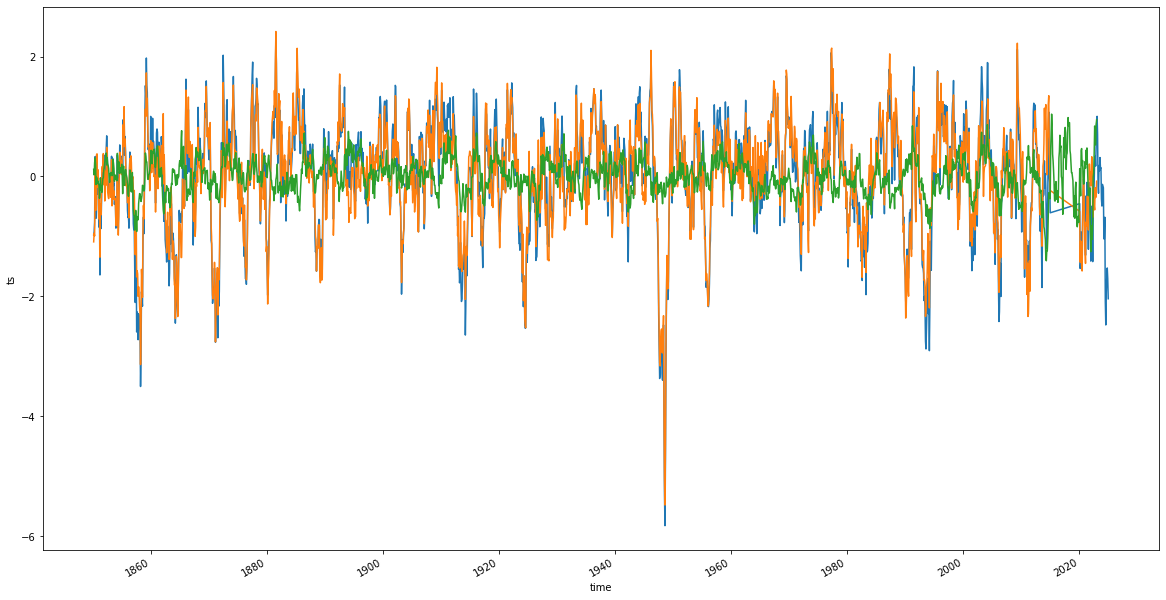

In [51]:
# plotting output to test
grad0 = gradFiles[0]
residual0 = grad0 - gradMean.gradient

grad0.plot(figsize = (20,10))
residual0.plot()
gradMean.gradient.plot()

## Checking whether the total of the gradient time series is about 0

In [58]:
models = ['UKESM1-0-LL',
 'MPI-ESM1-2-HR']

In [62]:
dictGradRes = defaultdict(list)

for model in models:

    # import the gradient files, calculate mean

    os.chdir(dirGrad)
    gradMean = CalculateMMEGradient(dirGrad, model)

    # subtract the mean from each gradient file
    gradFiles = os.listdir(dirGrad)
    gradFiles = [xr.open_dataarray(gradFile) for gradFile in gradFiles if model in gradFile]

    for i, grad in enumerate(gradFiles):

        # calculating residual
        gradResidual = grad - gradMean.gradient
        
        # saving to a dictionary
        dictGradRes[model].append(gradResidual)

        # keeping track
        print(f'{i+1} / {len(gradFiles)}')
        
dictGradRes = dict(dictGradRes)

1 / 19
2 / 19
3 / 19
4 / 19
5 / 19
6 / 19
7 / 19
8 / 19
9 / 19
10 / 19
11 / 19
12 / 19
13 / 19
14 / 19
15 / 19
16 / 19
17 / 19
18 / 19
19 / 19
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10
